In [ ]:
#아래의 코드는 가위, 바위, 보 이미지 데이터를 불러오고, 
#이를 28x28 사이즈로 리사이징하는 과정, 이 데이터를 학습하는 딥러닝 모델을 설계하고 학습시키는 과정, 
#그리고 테스트 데이터를 이용하여 모델을 평가하는 과정을 코드화 한 것입니다.

In [ ]:
#가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# 1. 데이터 내용: MNIST 데이터셋은 0부터 9까지의 손글씨 숫자 이미지를 포함하고 있습니다. 
#    반면에 가위바위보 데이터셋은 가위, 바위, 보의 손 모양 이미지를 포함하고 있습니다.

# 2. 데이터 형태 : MNIST 데이터 셋은 흑백이미지이며 가위바위보 데이터셋은 컬러이미지 입니다.

# 3. 클래스 수 : MNIST 데이터셋은 10개의 클래스이며 가위바위보 데이터셋은 3개의 클래스 입니다.

#시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요?
#모델이 훈련데이터에 과적합 되어서 발생한 것 입니다. 이를 해결하기 위해서는 더 많은 데이터를 수집하거나 가중치 규제, 드롭아웃등의 기법을 사용하여 모델이 과적합을 방지합니다.


In [1]:
# 필요한 라이브러리를 불러옵니다.
import tensorflow as tf
import numpy as np

print(tf.__version__)  # TensorFlow의 버전을 출력합니다.
print(np.__version__)  # NumPy의 버전을 출력합니다.

2.6.0
1.22.2


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
# 이미지를 28x28 사이즈로 리사이징하는 함수를 정의합니다.
def resize_images(img_path):
     # jpg 이미지 파일들의 리스트를 생성합니다.
	images=glob.glob(img_path + "/*.jpg")  
    
    # 리사이징할 이미지의 개수를 출력합니다.
	print(len(images), " images to be resized.")
    
    # 목표 이미지 크기를 설정합니다.
	target_size=(28,28)
	for img in images:
        # 이미지 파일을 열어서 old_img에 저장합니다.
		old_img=Image.open(img)
        # old_img를 28x28 사이즈로 리사이징하여 new_img에 저장합니다.
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
        # new_img를 JPEG 형식으로 저장합니다.
		new_img.save(img, "JPEG")
    
    # 리사이징할 이미지의 개수를 출력합니다.
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 28x28 사이즈로 리사이징합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 28x28 사이즈로 리사이징합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 28x28 사이즈로 리사이징합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [6]:
import numpy as np
# 이미지 데이터를 불러오는 함수를 정의합니다.
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


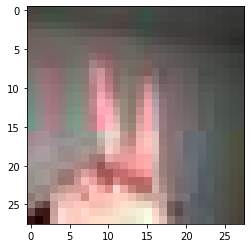

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 딥러닝 모델을 설계합니다.
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()# 모델의 구조를 출력합니다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [9]:
# 모델을 컴파일하고 학습시킵니다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 39ms/step - loss: 31.4339 - accuracy: 0.4267
Epoch 2/10
10/10 [==============================] - 0s 39ms/step - loss: 0.0712 - accuracy: 0.9767
Epoch 3/10
10/10 [==============================] - 0s 43ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 39ms/step - loss: 2.6085e-04 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 41ms/step - loss: 4.9621e-04 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 41ms/step - loss: 7.8791e-04 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 41ms/step - loss: 6.4065e-06 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 40ms/step - loss: 8.0663e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 40ms/step - loss: 6.8670e-06 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 38ms/step - loss: 1.1690e-06

In [10]:
# 테스트 데이터를 리사이징합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

# x_test, y_test 데이터를 불러옵니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0 

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.


In [11]:
# 테스트 데이터로 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0963 - accuracy: 0.4167
test_loss: 1.0963356494903564 
test_accuracy: 0.4166666567325592


In [ ]:
#회고
# 가위바위보 코드를 작성하면서 직전 메인퀘스트인 포켓몬 처럼 재미있게 진행할 수 있었습니다,
# Teachable Machine이라는 툴을 사용해서 직접 데이터도 수집하며 재미있게 했습니다.
# 딥러닝에 대해 아직 전부 이해하진 못했지만 앞으로 이런 프로그램 코딩 및 공부를 통해
# 더 학습을 해야 겠다는 생각을 했습니다.